In [16]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(reshape2)
    library(ggpubr)
    library(matrixStats)
})

In [2]:
df = read.csv("all_samples_phylum.csv")

In [3]:
df[1:5,1:5]

taxa,V1V2_HNO17_S8_R1,V1V2_HNO19_S9_R1,V1V2_HNO209_S14_R1,V1V2_HNO223_S15_R1
Actinobacteria,25,20,16,12
Amoebozoa,0,0,0,0
Archaeplastida,0,0,0,0
Bacteroidetes,37,18,15,22
Chloroflexi,0,0,0,0


In [4]:
df2_mat = as.matrix( df[-1])
rownames(df2_mat) = df$taxa

In [5]:
# sets
primer_sets = unique( sapply(strsplit(colnames(df2_mat),'_'),'[[',1) )
primer_sets

[1] "V1V2" "V2V3" "V3V4" "V4V5" "V5V7" "V7V9"

In [6]:
new_df = list();
for( i in 1:length(primer_sets) ){
    primer= primer_sets[i]
    print(primer)
    new_df[[primer]] = rowMeans(df2_mat[ , grep( primer, colnames(df2_mat))])
    }

[1] "V1V2"
[1] "V2V3"
[1] "V3V4"
[1] "V4V5"
[1] "V5V7"
[1] "V7V9"


In [7]:
new_df = as.data.frame( new_df )

In [8]:
new_df %>% head

,V1V2,V2V3,V3V4,V4V5,V5V7,V7V9
Actinobacteria,17.60869565,19.34782609,13.4782609,15.52173913,21.000000,6.5652174
Amoebozoa,0.00000000,0.00000000,0.0000000,0.04347826,0.000000,0.0000000
Archaeplastida,0.00000000,0.00000000,0.0000000,0.17391304,0.000000,0.0000000
Bacteroidetes,29.56521739,22.00000000,23.2608696,29.95652174,23.826087,16.9130435
Chloroflexi,0.04347826,0.04347826,0.0000000,0.00000000,0.000000,0.0000000
Cyanobacteria,0.08695652,0.08695652,0.3043478,0.39130435,0.173913,0.2173913


In [9]:
length( unique((rownames(new_df[ new_df$V1V2 !=0,]["V1V2"]))) )

[1] 14

In [10]:
length( unique((rownames(new_df[ new_df$V2V3 !=0,]["V1V2"]))) )

[1] 14

In [11]:
length( unique((rownames(new_df[ new_df$V4V5 !=0,]["V1V2"]))) )

[1] 16

In [12]:
length( unique((rownames(new_df[ new_df$V3V4 !=0,]["V1V2"]))) )

[1] 14

In [13]:
length( unique((rownames(new_df[ new_df$V3V4 !=0,]["V1V2"]))) )

[1] 14

In [14]:
v1v2 = length( unique((rownames(new_df[ new_df$V1V2 !=0,]["V1V2"]))) )
v2v3 = length( unique((rownames(new_df[ new_df$V2V3 !=0,]["V2V3"]))) )
v3v4 = length( unique((rownames(new_df[ new_df$V3V4 !=0,]["V3V4"]))) )
v4v5 = length( unique((rownames(new_df[ new_df$V4V5 !=0,]["V4V5"]))) )
v5v7 = length( unique((rownames(new_df[ new_df$V5V7 !=0,]["V5V7"]))) )
v7v9 = length( unique((rownames(new_df[ new_df$V5V7 !=0,]["V7V9"]))) )

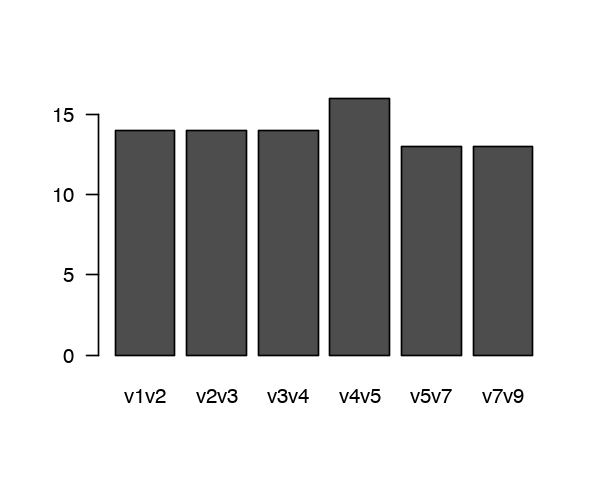

In [15]:
options(repr.plot.height=4, repr.plot.width=5)
barplot( cbind( v1v2, v2v3, v3v4, v4v5, v5v7, v7v9 ) , las=1)